# 1. Exploratory Data Analysis (EDA)


## Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load Data
df = pd.read_csv('../data/shipment_booking_data_2021_2025.csv')
df['booking_date'] = pd.to_datetime(df['booking_date'])

print(f"Total Bookings: {len(df)}")
print(f"Date Range: {df['booking_date'].min().date()} to {df['booking_date'].max().date()}")

Total Bookings: 206559
Date Range: 2021-01-01 to 2025-12-31


## Dataset Overview

In [3]:
# Display first few rows
print("\nFirst 10 rows:")
display(df.head(10))

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())


First 10 rows:


,company_name,shipment_type,booking_date
0,BlueDart,Express,2021-01-01
1,BlueDart,Surface,2021-01-01
2,BlueDart,Surface,2021-01-01
3,BlueDart,Air,2021-01-01
4,BlueDart,Surface,2021-01-01
5,BlueDart,Air,2021-01-01
6,BlueDart,Air,2021-01-01
7,BlueDart,Surface,2021-01-01
8,BlueDart,Air,2021-01-01
9,BlueDart,Surface,2021-01-01



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206559 entries, 0 to 206558
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   company_name   206559 non-null  object        
 1   shipment_type  206559 non-null  object        
 2   booking_date   206559 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 4.7+ MB
None

Basic Statistics:
                        booking_date
count                         206559
mean   2023-07-10 14:42:11.968105728
min              2021-01-01 00:00:00
25%              2022-04-09 00:00:00
50%              2023-07-18 00:00:00
75%              2024-10-11 00:00:00
max              2025-12-31 00:00:00


In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
company_name     0
shipment_type    0
booking_date     0
dtype: int64


## Company Analysis

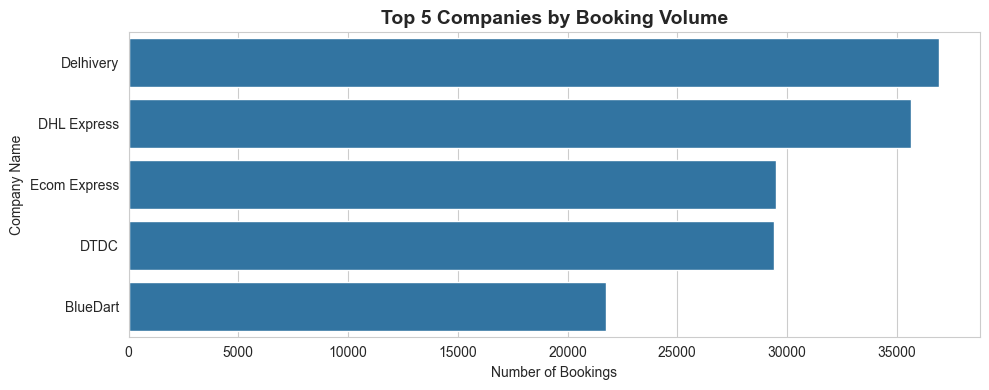


Top 10 Companies:
company_name
Delhivery       36946
DHL Express     35656
Ecom Express    29516
DTDC            29388
BlueDart        21769
FedEx India     21510
XpressBees      17861
Shadowfax       13913
Name: count, dtype: int64


In [5]:
# Top Companies by Volume
plt.figure(figsize=(10, 4))
top_companies = df['company_name'].value_counts().head(5)
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title('Top 5 Companies by Booking Volume', fontsize=14, fontweight='bold')
plt.xlabel('Number of Bookings')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

print("\nTop 10 Companies:")
print(df['company_name'].value_counts().head(10))

In [6]:
# Total number of unique companies
print(f"\nTotal Unique Companies: {df['company_name'].nunique()}")


Total Unique Companies: 8


## Shipment Type Analysis

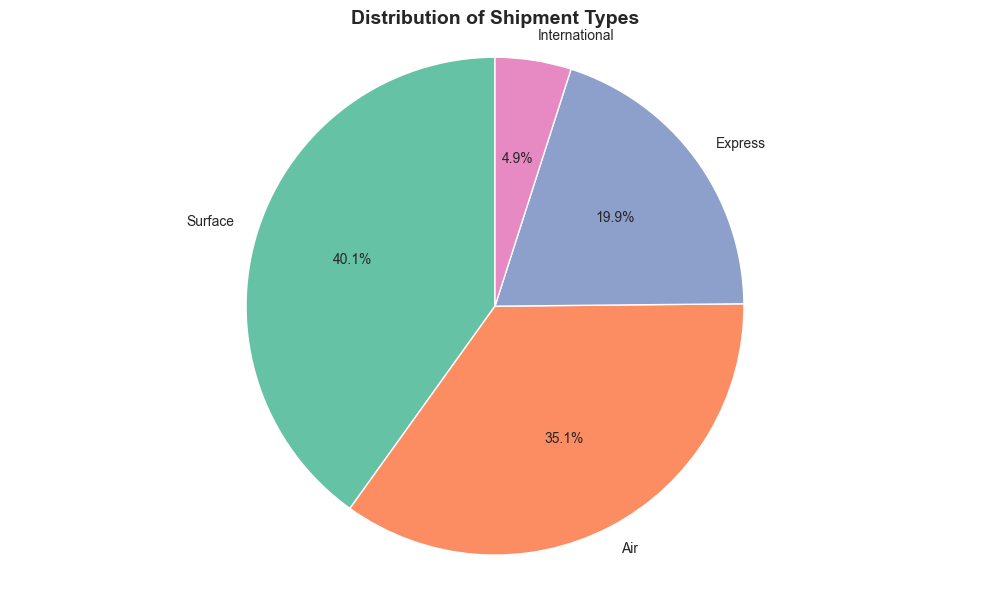


Shipment Type Counts:
shipment_type
Surface          82825
Air              72412
Express          41115
International    10207
Name: count, dtype: int64


In [7]:
# Distribution of Shipment Types
plt.figure(figsize=(10, 6))
shipment_counts = df['shipment_type'].value_counts()
colors = sns.color_palette('Set2', len(shipment_counts))
plt.pie(shipment_counts.values, labels=shipment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribution of Shipment Types', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\nShipment Type Counts:")
print(shipment_counts)

<Figure size 1200x600 with 0 Axes>

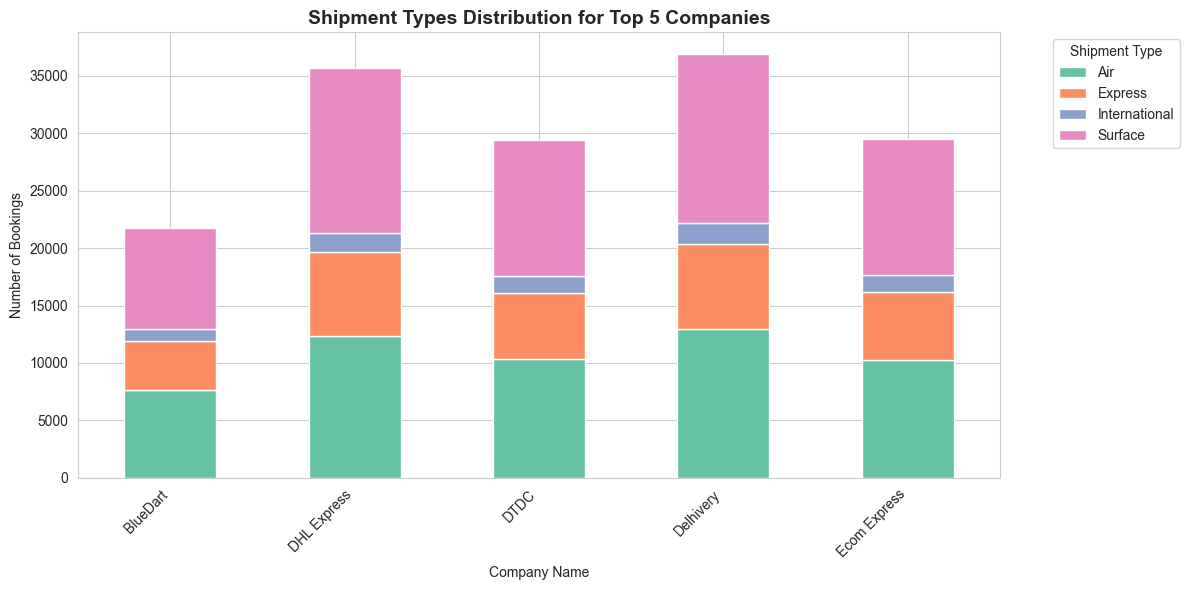

In [8]:
# Shipment types by company (for top 5 companies)
top_5_companies = df['company_name'].value_counts().head(5).index
df_top5 = df[df['company_name'].isin(top_5_companies)]

plt.figure(figsize=(12, 6))
shipment_by_company = pd.crosstab(df_top5['company_name'], df_top5['shipment_type'])
shipment_by_company.plot(kind='bar', stacked=True, color=sns.color_palette('Set2', 4))
plt.title('Shipment Types Distribution for Top 5 Companies', fontsize=14, fontweight='bold')
plt.xlabel('Company Name')
plt.ylabel('Number of Bookings')
plt.legend(title='Shipment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Temporal Analysis

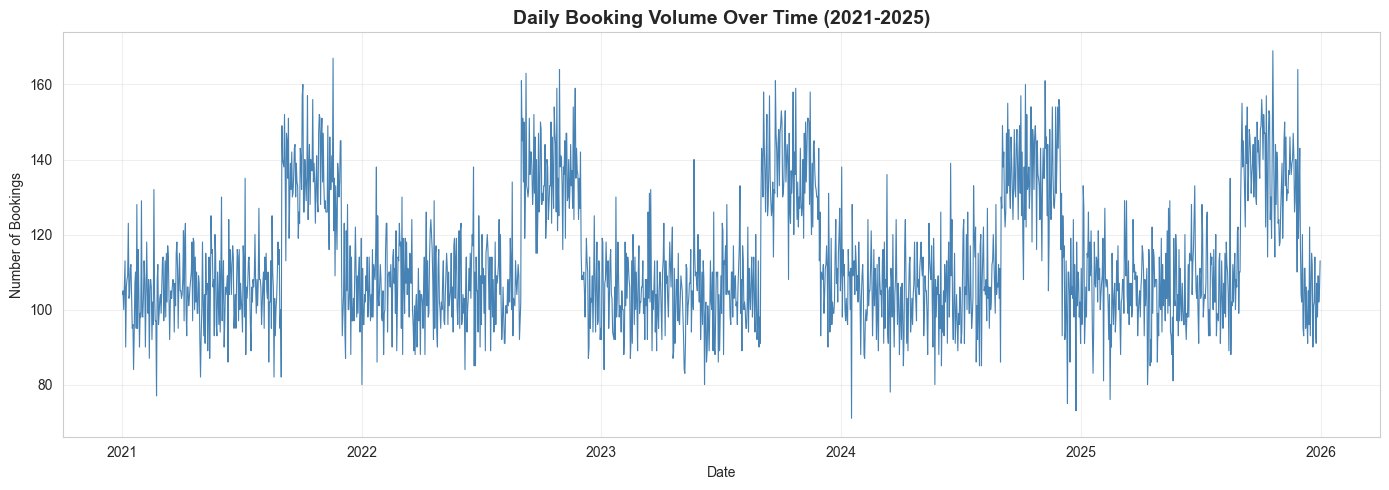

In [9]:
# Daily booking trends over time
daily_bookings = df.groupby('booking_date').size()

plt.figure(figsize=(14, 5))
plt.plot(daily_bookings.index, daily_bookings.values, linewidth=0.8, color='steelblue')
plt.title('Daily Booking Volume Over Time (2021-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

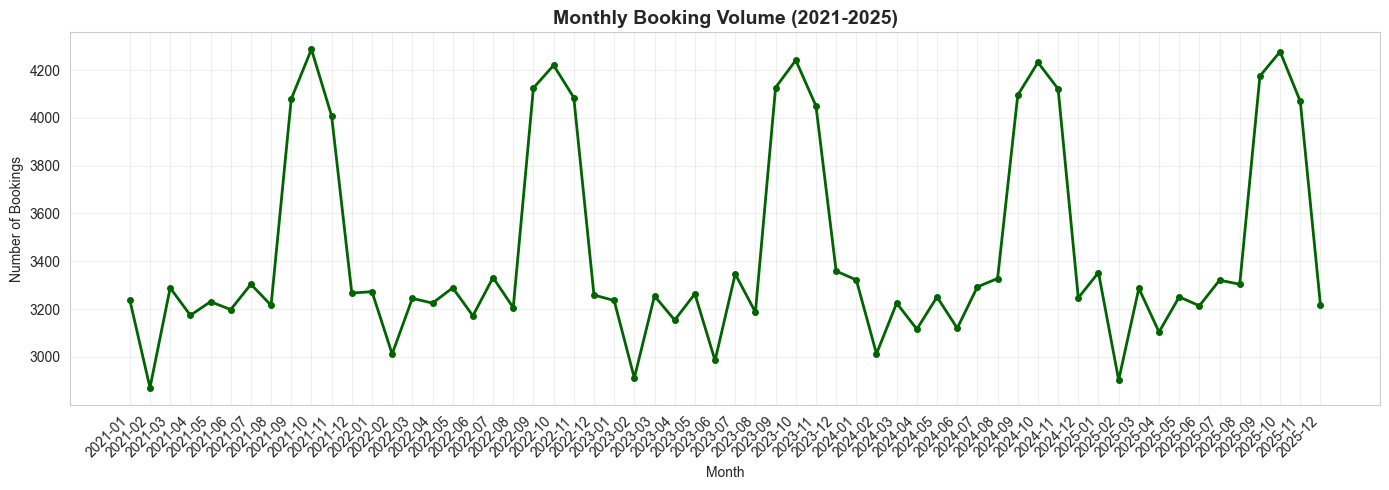

In [10]:
# Monthly aggregation
df['year_month'] = df['booking_date'].dt.to_period('M')
monthly_bookings = df.groupby('year_month').size()

plt.figure(figsize=(14, 5))
plt.plot(monthly_bookings.index.astype(str), monthly_bookings.values, 
         marker='o', linewidth=2, markersize=4, color='darkgreen')
plt.title('Monthly Booking Volume (2021-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/ty/clh1s5px22gg80vc5j58f9qh0000gn/T/ipykernel_74931/3226826650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_bookings.index, y=yearly_bookings.values, palette='viridis')


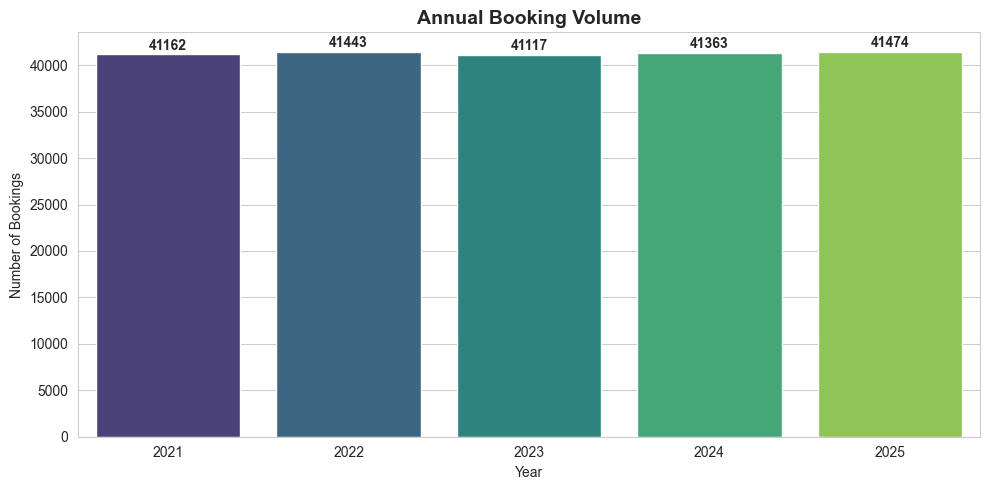


Yearly Booking Counts:
year
2021    41162
2022    41443
2023    41117
2024    41363
2025    41474
dtype: int64


In [11]:
# Yearly comparison
df['year'] = df['booking_date'].dt.year
yearly_bookings = df.groupby('year').size()

plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_bookings.index, y=yearly_bookings.values, palette='viridis')
plt.title('Annual Booking Volume', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
for i, v in enumerate(yearly_bookings.values):
    plt.text(i, v + 500, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

print("\nYearly Booking Counts:")
print(yearly_bookings)

## Seasonality Patterns

/var/folders/ty/clh1s5px22gg80vc5j58f9qh0000gn/T/ipykernel_74931/60631479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_bookings.index, y=dow_bookings.values, palette='coolwarm')


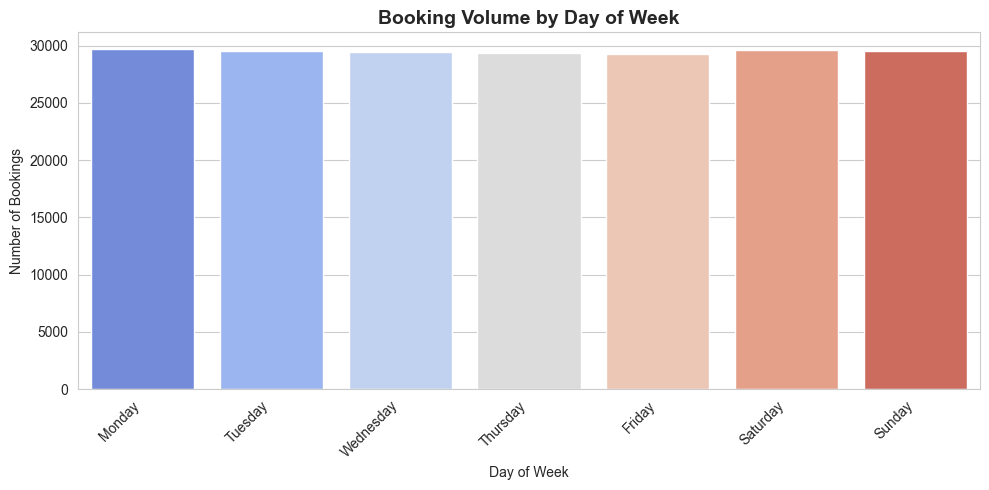

In [12]:
# Day of week analysis
df['day_of_week'] = df['booking_date'].dt.dayofweek
df['day_name'] = df['booking_date'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_bookings = df.groupby('day_name').size().reindex(day_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=dow_bookings.index, y=dow_bookings.values, palette='coolwarm')
plt.title('Booking Volume by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/ty/clh1s5px22gg80vc5j58f9qh0000gn/T/ipykernel_74931/3698562323.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_pattern.index, y=monthly_pattern.values, palette='RdYlGn')


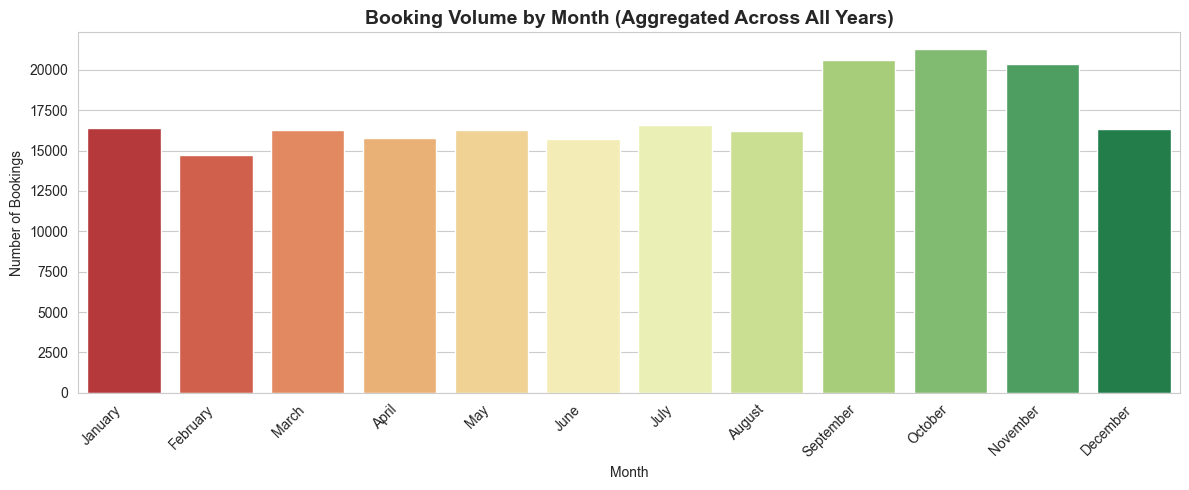

In [13]:
# Monthly seasonality (all years combined)
df['month'] = df['booking_date'].dt.month
df['month_name'] = df['booking_date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_pattern = df.groupby('month_name').size().reindex(month_order)

plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_pattern.index, y=monthly_pattern.values, palette='RdYlGn')
plt.title('Booking Volume by Month (Aggregated Across All Years)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Shipment Type Trends Over Time

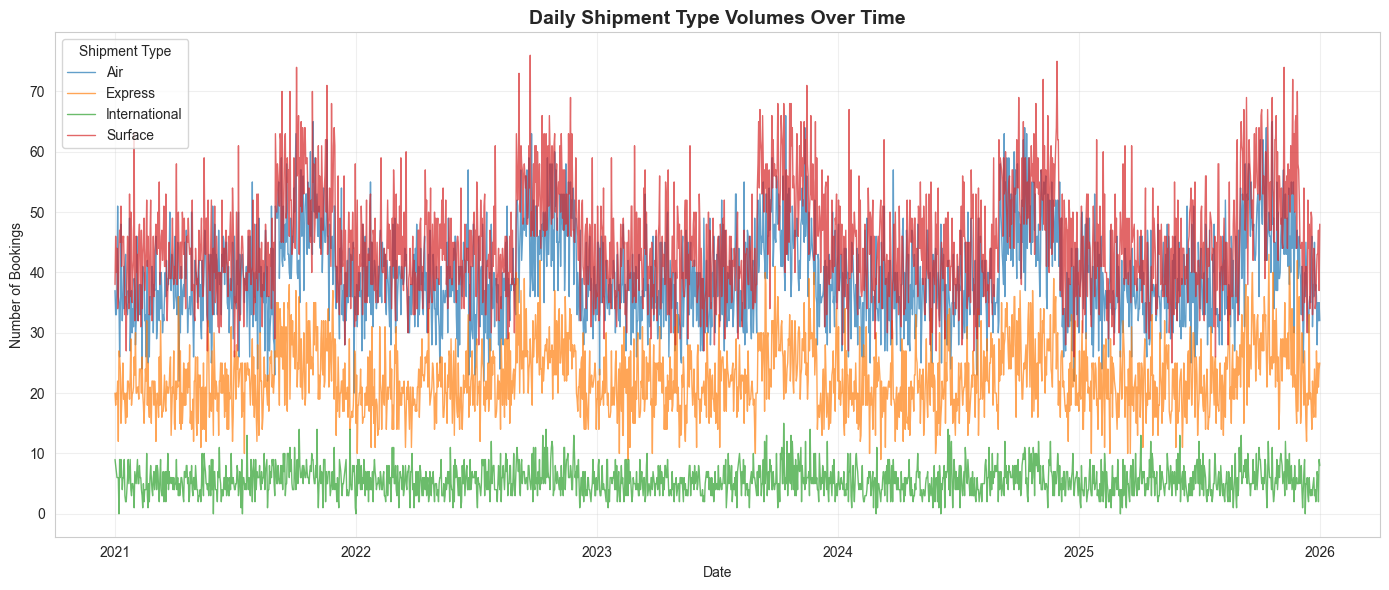

In [14]:
# Daily shipment type trends
shipment_daily = df.groupby(['booking_date', 'shipment_type']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
for col in shipment_daily.columns:
    plt.plot(shipment_daily.index, shipment_daily[col], label=col, linewidth=1, alpha=0.7)
plt.title('Daily Shipment Type Volumes Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.legend(title='Shipment Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

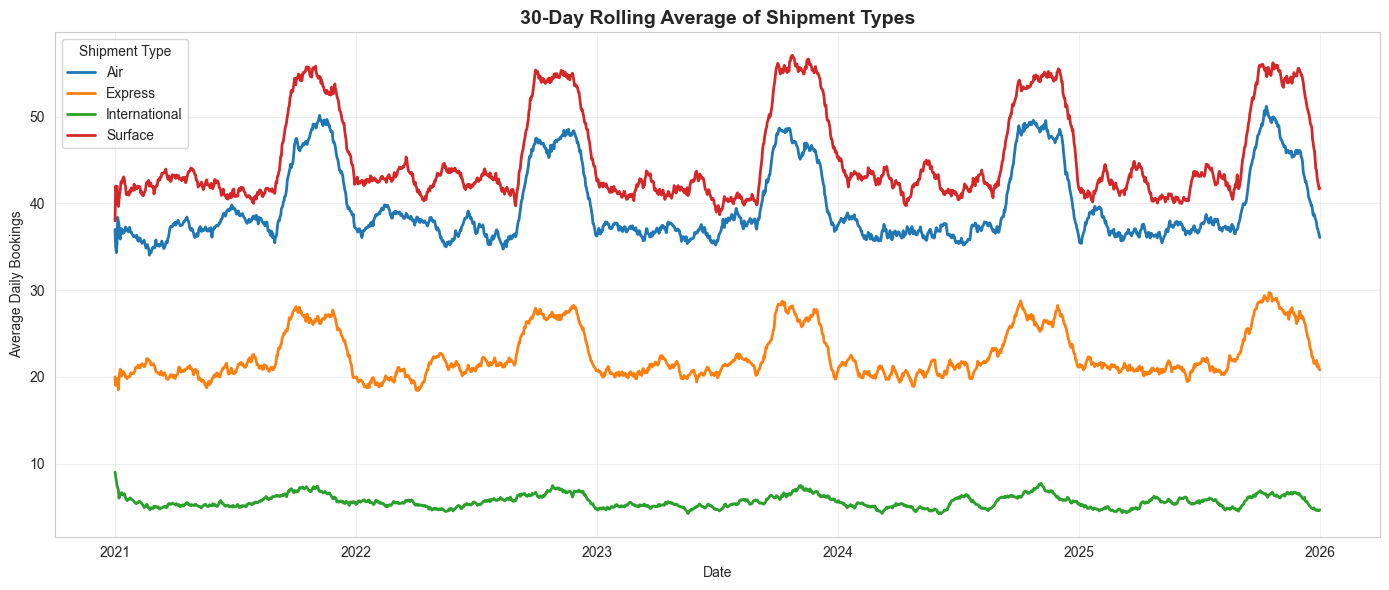

In [15]:
# Rolling 30-day average by shipment type
shipment_daily_smooth = shipment_daily.rolling(window=30, min_periods=1).mean()

plt.figure(figsize=(14, 6))
for col in shipment_daily_smooth.columns:
    plt.plot(shipment_daily_smooth.index, shipment_daily_smooth[col], 
             label=col, linewidth=2)
plt.title('30-Day Rolling Average of Shipment Types', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Average Daily Bookings')
plt.legend(title='Shipment Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary Statistics

In [16]:
print("="*60)
print("EDA SUMMARY")
print("="*60)
print(f"\nTotal Records: {len(df):,}")
print(f"Date Range: {df['booking_date'].min().date()} to {df['booking_date'].max().date()}")
print(f"Total Days: {(df['booking_date'].max() - df['booking_date'].min()).days + 1}")
print(f"\nUnique Companies: {df['company_name'].nunique()}")
print(f"Unique Shipment Types: {df['shipment_type'].nunique()}")
print(f"\nShipment Types: {list(df['shipment_type'].unique())}")
print(f"\nAverage Daily Bookings: {len(df) / ((df['booking_date'].max() - df['booking_date'].min()).days + 1):.2f}")
print("="*60)

EDA SUMMARY

Total Records: 206,559
Date Range: 2021-01-01 to 2025-12-31
Total Days: 1826

Unique Companies: 8
Unique Shipment Types: 4

Shipment Types: ['Express', 'Surface', 'Air', 'International']

Average Daily Bookings: 113.12
